# **Web Scraping & Analysis Project: Nykaa Products Analysis**
This project involves collecting and analyzing data of body lotion products from the Nykaa website. The goal is to understand pricing trends, volume distribution, and brand-based insights — all based on the product metadata alone (excluding user reviews or ratings).

## **Introduction**
* In this project, I am building a web scraping script to extract structured product details from Nykaa, a popular beauty and cosmetics website. 
* Using Python and BeautifulSoup, I crawl through the website and retrieve information such as product names, brand, prices, and volumes for all the products listed on the 5 pages.
* The extracted data is then organized into a CSV file for further analysis.

---

## **Project Objective**
To collect and analyze body lotion product data from the Nykaa website — focusing on key attributes such as **product name, price, volume, and brand**. This project helps identify **pricing trends**, **volume distribution**, and **brand-wise insights**, without relying on customer reviews or ratings.
- Clearly define the purpose of this project — collecting Nykaa body lotion product data and analyzing key features like price, volume, and brand.

---

## **Workflow Overview**
###### `Data Collection → Data Understanding → Data Cleaning → Data Visualization → Insights`

---

## **Step 1: Import Required Libraries** 
Import all the necessary Python libraries for web scraping, data handling, and visualization

---

## **Step 2: Collect Product Links** 
Use requests and BeautifulSoup to extract product page links from multiple pages in Nykaa’s body lotion category.
ody lotinory.

---

## **Step 3: Define Scraping Functions**  
Define helper functions to extract details like product name, volume, and price from individulct pages.

---

## **Step 4: Scrape Product Data**  
Loop through each product link and use the defined functions to extrcttore the data.

---

## **Step 5: Creating a DataFrame**  
Convert the scraped data into a pandas DataFrame toentructured analysis.

---

## **Step 6: Clean and Extract Volume Data**  
Use regex to extract the numerical quantity (in ml/gm) foct volume descriptions.

---

## **Step 7: Extract Brand Name**  
Extract brand names from product titles by taking the firs r prefix in the product name.

---

## **Step 8: Final Cleanup**  
Clean the dataset by removing rows with missing or nalues in price or volume columns.

---

## **Step 9: Data Analysis & Visualizations**  
Analyze the clea data through various types of visualizations.

- ### **Step 9.1: Univariate Data Visualization**
  Explore the distribution of indivual variables like price and volume using histograms.

  - **Price Distribution**: Shows how product prices vary.  
  - **Volume Distribution**:derstand the frequency of different product sizes.  

    --
    
  - #### **Step 9.1.1: Pie Chart - Top Brands by Frequency**
    - Visualizes which brands appear most frequently in the dataset.
    
    --
    
  - #### **Discrete Data Visualization**  
    Focuses on categorical data like brands using bar charts.  
    - **Brand-wise rage Price**: Bar chart showing the average price per brand.

--

- ### **Step 9.2: Bivariate Data Visualization**  
  Visualize relationships between two variables.  

  - **Price vs Volume**:scatter plot to explore how product volume relates to its price.

--

- ### **Step 9.3: Correlation Matrix**  
  Visualize correlatiobetween numerical columns such as price, volume, and price-per-ml.

-- 

- ### **Step 9.4: Boxplot**  
  VPrice Distribution by Brand pare the price spread across different brands using a boxplot.

---

## **Step 10: Conclusion**  
Summarize the findings, key patterns observed, and what insights can be derived from the analysis. Also, briefly mention possible future improvements.

- We successfully scraped product data from Nykaa's body lotion section without relying on customer reviews or JavaScript-rendered content.
- We analyzed key metrics like **price**, **volume**, **brand distribution**, and **cost-effectiveness**.
- The results highlight affordable options, premium brands, and volume trends in the market.


This project demonstrates how basic product data can yield useful insights into an e-commerce platform's product segment.


## Step 1: Import Required Libraries

In [4]:
import requests   # Sends HTTP requests to fetch the webpage
from bs4 import BeautifulSoup   # Parses, navigates HTML pages/content and extracts content
import pandas as pd   # Organizes scraped data into a DataFrame for easy viewing/exporting
import time   # Adds delays between requests to avoid hammering the server and to prevent overloading the server
from tqdm import tqdm   # for Progress Visualization
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns   # Data Visualization
import re   # To extract specific data patterns and for pattern matching


import http.client

# Increase limit (e.g., 1000 instead of 100)
http.client._MAXHEADERS = 1000


These libraries are essential for:
- Web scraping (`requests`, `BeautifulSoup`)
- Data handling (`pandas`)
- Time delays (`time`)
- Progress visualization (`tqdm`)
- Data visualization (`matplotlib`, `seaborn`)
- Pattern matching (`re`)


## Step 2: Collect Product Links
Scraping multiple Nykaa category pages by fetching pages to extract individual product page links.

In [7]:
headers = {'User-Agent': 'Mozilla/5.0'}   # Request headers
prod_links = []   # List to collect data

# URL of the nykaa website which is used to scrape data
base_url = 'https://www.nykaa.com/bath-body/body-care/body-lotions-moisturizers/c/371?page_no='

# Scrapes 25 pages
for page_num in range(1, 32):
    print(f"Fetching page {page_num}...")
    url = base_url + str(page_num)
    res = requests.get(url, headers=headers)   # sends the request
    soup = BeautifulSoup(res.content, 'html.parser')

    anchors = soup.find_all('a', attrs={'class': 'css-qlopj4'})
    for a in anchors:
        href = a.get('href')
        if href and href.startswith('/'):
            full_url = 'https://www.nykaa.com' + href
            prod_links.append(full_url)
    
    time.sleep(1)

print(f"Total product links collected: {len(prod_links)}")
print("Done")

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Total product links collected: 620
Done


## Step 3: Define Scraping Functions
Using helper functions to fetch product details and extract specific details like product name, volume, and price from each product page.

In [9]:
# function to extract product name
def get_name(soup):
    try:
        return soup.find('h1', attrs={'class': 'css-1gc4x7i'}).text.strip()
    except:
        return 'None'

# function to extract product volume/size
def get_vol(soup):
    try:
        vol_tag = soup.find('span', attrs={'class': 'css-1ctpgu6'})
        if vol_tag:
            vol_text = vol_tag.text.strip()
            parts = vol_text.split('\n')
            if len(parts) >= 3:
                return parts[2].strip()
            else:
                return vol_text
        else:
            return 'None'
    except:
        return 'None'

# function to extract product price
def get_price(soup):
    try:
        return soup.find('span', attrs={'class': 'css-1jczs19'}).text.strip().replace('₹', '').replace(',', '')
    except:
        return 'None'

## Step 4: Scrape Product Data
Loop through each product link and collect all required product details using the functions above.

In [11]:
# Dictionary to store all scraped data
d = {'prod_name': [], 'prod_vol': [], 'prod_price': []}

# Loop through each product link and scrape info
for link in tqdm(prod_links, desc="Scraping Products"):
    try:
        prod_page = requests.get(link, headers=headers)
        prod_soup = BeautifulSoup(prod_page.content, 'html.parser')

        d['prod_name'].append(get_name(prod_soup))
        d['prod_vol'].append(get_vol(prod_soup))
        d['prod_price'].append(get_price(prod_soup))
        
        time.sleep(0.5)   # time delay of 0.5 seconds
    except:
        continue

print("Scraping completed")
print("Done")

Scraping Products: 100%|███████████| 620/620 [09:30<00:00,  1.09it/s]

Scraping completed
Done


## Step 5: Creating a DataFrame
Now we convert the collected dictionary into a pandas DataFrame.

In [13]:
df = pd.DataFrame(d)

# Convert price to numeric
df['prod_price'] = pd.to_numeric(df['prod_price'], errors='coerce')

In [14]:
df.head()   # to see top 5 scraped from dataframe

,prod_name,prod_vol,prod_price
0,Bath & Body Works A Thousand Wishes Daily Nour...,(236ml),1100
1,Vaseline Gluta-Hya Dewy Radiance Lotion Bright...,(200ml),323
2,MCaffeine Summer Breeze Perfume Body Lotion(30...,(300ml),399
3,Nykaa Wanderlust French Lavender Floral Fragra...,(300ml),468
4,Sol de Janeiro Glowmotions Body Oil Glow Anywh...,(60ml),3285


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   prod_name   620 non-null    object
 1   prod_vol    620 non-null    object
 2   prod_price  620 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.7+ KB


In [16]:
df.describe()

,prod_price
count,620.000000
mean,932.977419
std,1039.846548
min,81.000000
25%,367.000000
50%,603.500000
75%,1150.000000
max,10640.000000


## Step 6: Clean and Extract Volume Data
Use regular expressions to extract the numerical volume (ml/gm) from the product volume column.

In [18]:
def extract_volume(text):
    try:
        match = re.search(r'(\d+\.?\d*)\s*(ml|g|gm|kg|l)', text.lower())
        if match:
            val = float(match.group(1))
            unit = match.group(2)
            # Normalize to ml
            if unit in ['g', 'gm']:
                return val  # keep grams
            elif unit == 'kg':
                return val * 1000  # convert to grams
            elif unit == 'l':
                return val * 1000  # convert to ml
            else:
                return val  # ml
        else:
            return None
    except:
        return None

df['volume'] = df['prod_vol'].apply(extract_volume)

In [19]:
df['volume']

0      236.0
1      200.0
2      300.0
3      300.0
4       60.0
       ...  
615    150.0
616    300.0
617    226.0
618    400.0
619    300.0
Name: volume, Length: 620, dtype: float64

## Step 7: Extract Brand Name
We take the first word from the product name as the brand.

In [21]:
df['brand'] = df['prod_name'].apply(lambda x: x.split()[0] if x != 'None' else 'Unknown')

In [22]:
df['brand']

0           Bath
1       Vaseline
2      MCaffeine
3          Nykaa
4            Sol
         ...    
615     Glamveda
616    Mamaearth
617         Bath
618        Oshea
619       Jovees
Name: brand, Length: 620, dtype: object

## Step 8: Final Cleanup
Remove rows with missing or invalid price and volume.

In [24]:
df_clean = df.dropna(subset=['prod_price', 'volume'])   # Remove rows where price or volume is missing

df_clean = df_clean[df_clean['volume'] > 0]   # Remove rows where volume is 0 or negative (invalid)

df_clean['volume'] = pd.to_numeric(df_clean['volume'], errors='coerce')   # Convert volume to numeric if it's still object (precaution)

df_clean['price_per_ml'] = df_clean['prod_price'] / df_clean['volume']   # Calculate price per ml/gm

df_clean.reset_index(drop=True, inplace=True)   # Optional: Reset index for clean DataFrame

df_clean.to_csv('nykaa_bodylotions_clean.csv', index=False)   # Export cleaned data to CSV

## Step 9: Data Analysis & Visualizations

### Step 9.1: Univariate Data Visualization
Univariate analysis involves exploring one variable at a time. It helps understand the distribution and general behavior of individual features.

### Price Distribution
This histogram shows how product prices are distributed across all scraped body lotions.

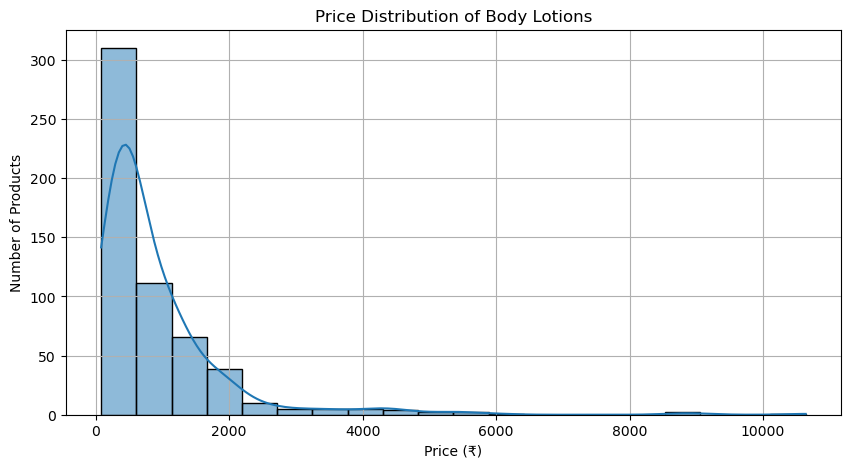

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['prod_price'], bins=20, kde=True)
plt.title('Price Distribution of Body Lotions')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()

### Volume Distribution
This plot shows the frequency of different product volumes (ml/gm) to understand common sizes.

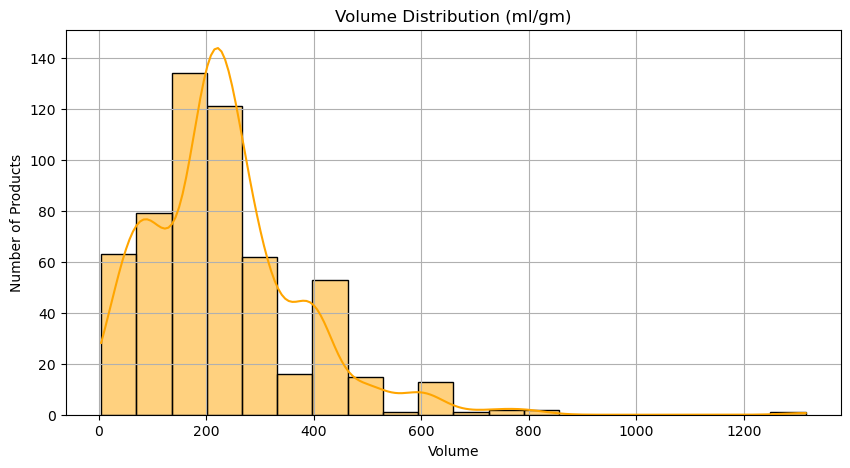

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['volume'], bins=20, kde=True, color='orange')
plt.title('Volume Distribution (ml/gm)')
plt.xlabel('Volume')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()

### Step 9.1.1: Pie Chart - Top Brands by Frequency

This pie chart shows which brands occur most frequently in the scraped product lis.


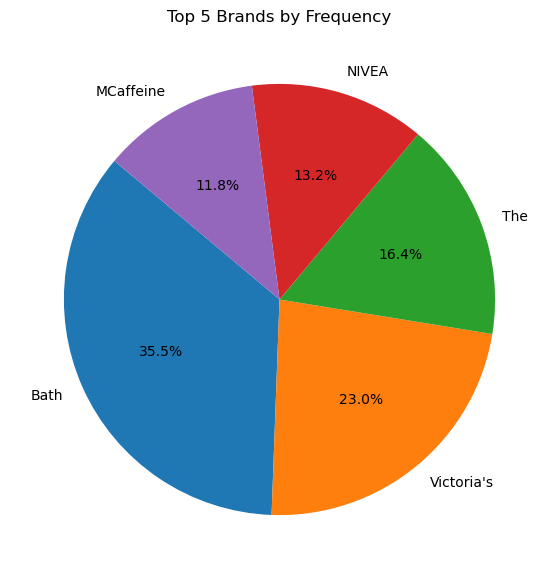

In [31]:
brand_counts = df_clean['brand'].value_counts().head(5)

plt.figure(figsize=(7,7))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Brands by Frequency')
plt.show()

### Discrete Data Visualization (within Univariate)
Here, we analyze **categorical variables** like product brands using bar plots.

#### Brand-wise Average Price
We calculate and visualize the average price of the top 10 most frequent brands.

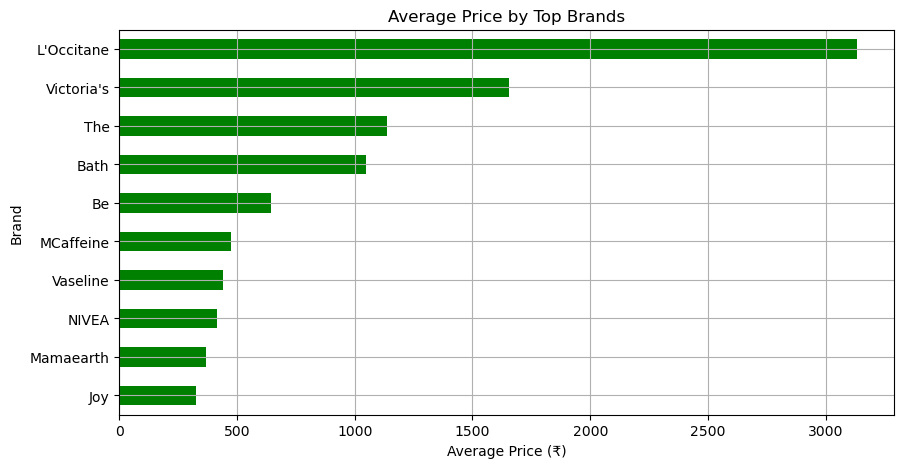

In [33]:
top_brands = df_clean['brand'].value_counts().head(10).index
avg_price_per_brand = df_clean[df_clean['brand'].isin(top_brands)].groupby('brand')['prod_price'].mean().sort_values()

plt.figure(figsize=(10,5))
avg_price_per_brand.plot(kind='barh', color='green')
plt.title('Average Price by Top Brands')
plt.xlabel('Average Price (₹)')
plt.ylabel('Brand')
plt.grid(True)
plt.show()

## Step 9.2: Bivariate Data Visualization
Bivariate analysis examines the relationship between two variables.

### Price vs Volume Scatter Plot
This scatter plot helps us explore the correlation between product volume and its price.

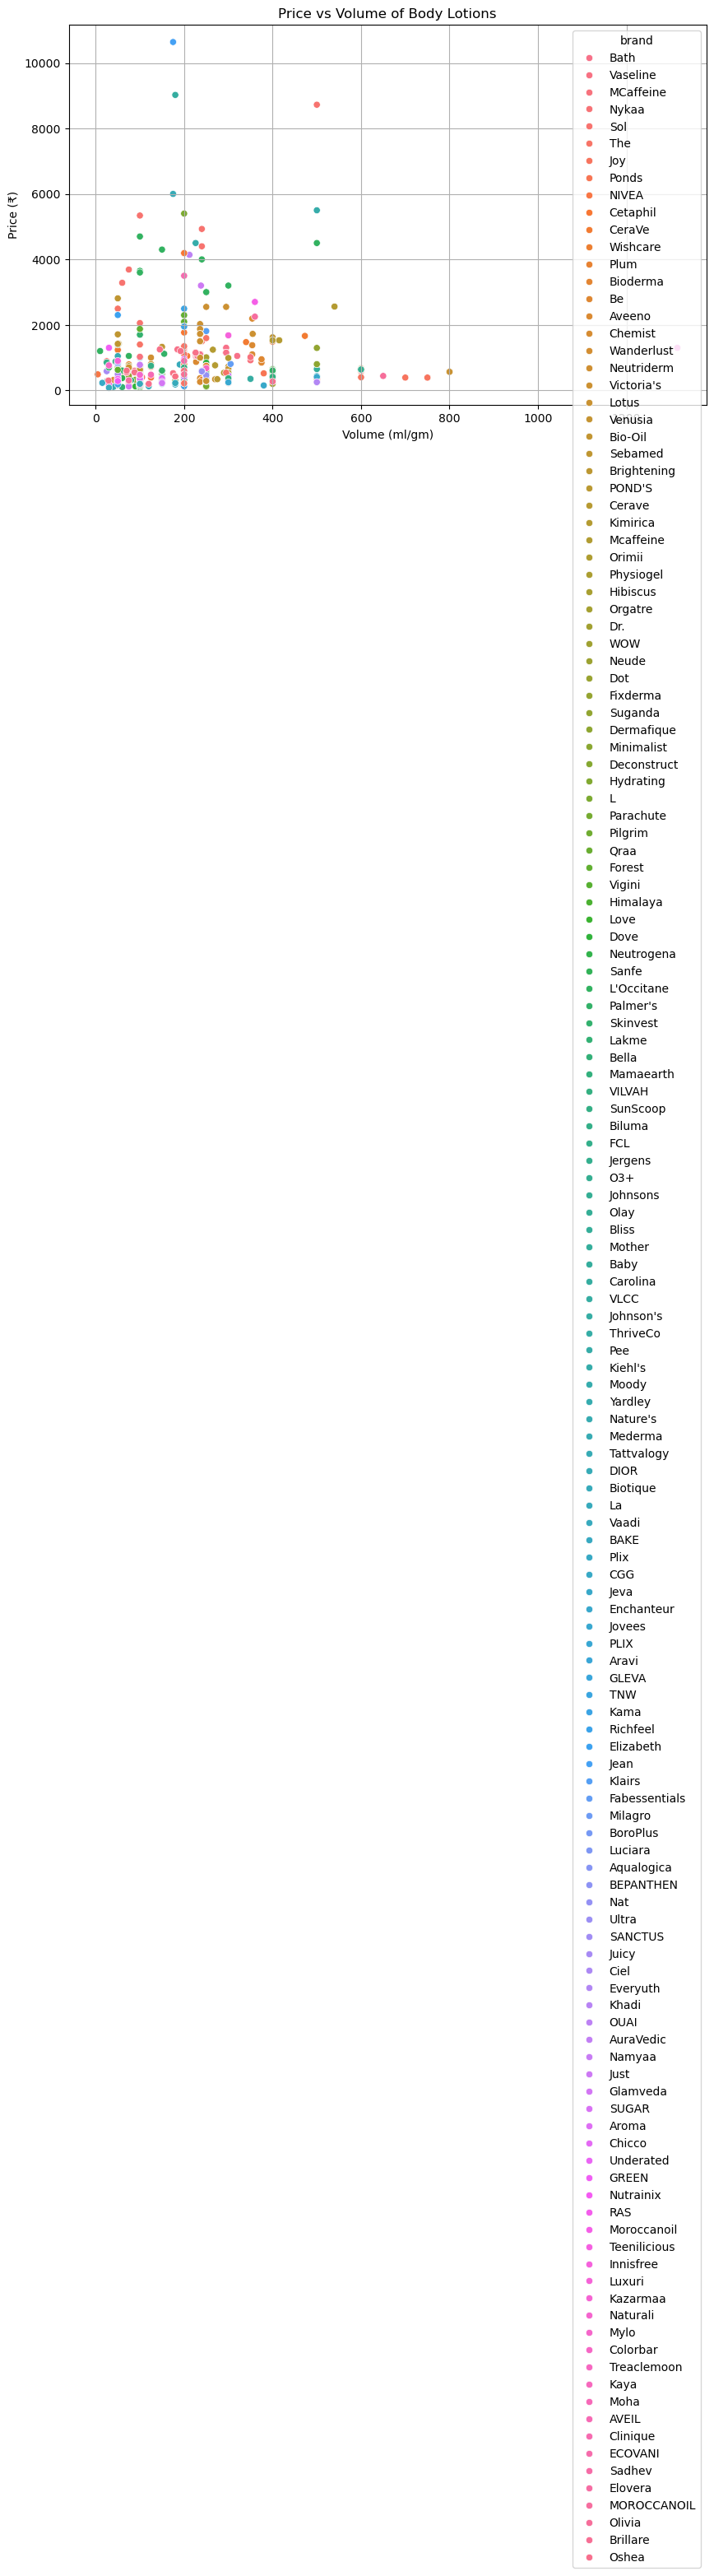

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='volume', y='prod_price', data=df_clean, hue='brand')
plt.title('Price vs Volume of Body Lotions')
plt.xlabel('Volume (ml/gm)')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.show()

## Step 9.3: Correlation Matrix
We visualize the correlation between numerical features like price, volume, and price per ml using a heatmap. This helps identify potential linear relationships.

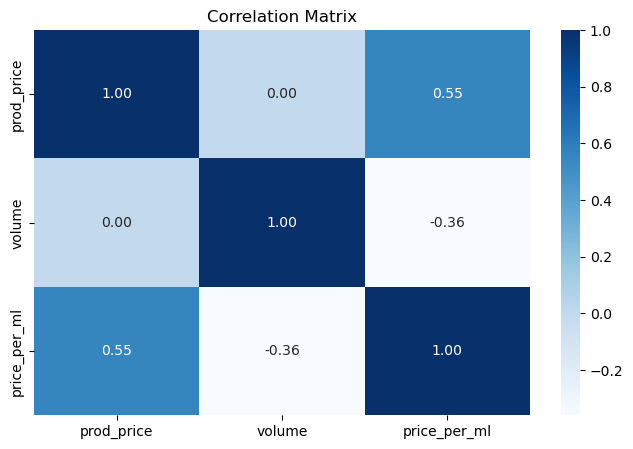

In [37]:
plt.figure(figsize=(8,5))
sns.heatmap(df_clean[['prod_price', 'volume', 'price_per_ml']].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Step 9.4: Boxplot - Price Distribution by Brand
This boxplot compares price distributions for top brands, allowing us to see variation, medians, and outliers within each brand.

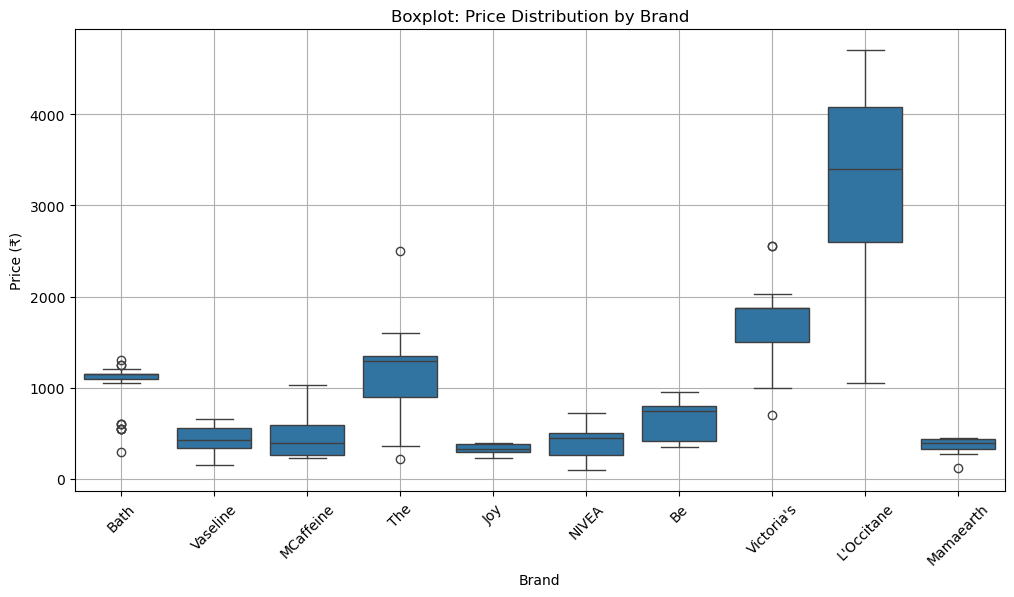

In [39]:
top_brands_df = df_clean[df_clean['brand'].isin(top_brands)]

plt.figure(figsize=(12,6))
sns.boxplot(data=top_brands_df, x='brand', y='prod_price')
plt.title('Boxplot: Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Most and Least Expensive Products

In [41]:
# Top 10 expensive products
print("Top 10 Most Expensive Products:")
display(df_clean.sort_values(by='prod_price', ascending=False)[['prod_name', 'prod_price']].head(10))

# Top 10 cheapest products
print("\n Top 10 Cheapest Products:")
display(df_clean.sort_values(by='prod_price')[['prod_name', 'prod_price']].head(10))

Top 10 Most Expensive Products:


,prod_name,prod_price
332,Jean Paul Gaultier Gaultier Divine Eau De Parf...,10640
232,Carolina Herrera Good Girl Eau De Parfum With ...,9024
268,Sol de Janeiro Biggie Biggie Beija Flor Elasti...,8725
281,DIOR Miss DIOR Comforting Body Milk with Rose ...,6000
252,Kiehl's Creme De Corps Body Moisturizer With P...,5500
115,L Occitane Almond Milk Concentrate (Milk Conce...,5400
261,Sol de Janeiro Beija Flor Elasti-Body Oil(100ml),5340
116,Sol de Janeiro Beija Flor Collagen-Boosting El...,4930
180,L'Occitane Almond Shimmering Body Oil(100ml),4700
399,Kiehl's Creme De Corps Soy Milk & Honey Whippe...,4500



 Top 10 Cheapest Products:


,prod_name,prod_price
479,"Vaadi Herbals Fairness Cream - Saffron, Aloe V...",81
244,Himalaya Aloe And Cucumber Refreshing Body Lot...,92
352,"NIVEA MEN Creme, Non Greasy Moisturizer, Cream...",94
174,Lakme Peach Milk Intense Moisturizer Lotion(60ml),99
375,Nature's Essence Glowing Gold++ Facial Kit(40g),105
117,Parachute Advansed Cocoa Repair Body Lotion Fo...,110
415,Glamveda 1% Glycolic Acid & 1% Salicylic Acid ...,120
240,Dove Body Love Nourished Radiance Body Lotion(...,120
491,Richfeel Almond Body Lotion with 2X Almond Oil...,125
357,Mamaearth Daily Moisturizing Baby Lotion(100ml),125


## Cost-Effectiveness (Price per ml)

In [43]:
# Most cost-effective products
print("Most Cost-Effective Products (Lowest ₹ per ml):")
display(df_clean.sort_values(by='price_per_ml')[['prod_name', 'prod_price', 'volume', 'price_per_ml']].head(10))

# Most expensive per ml
print("\n Most Expensive Products per ml:")
display(df_clean.sort_values(by='price_per_ml', ascending=False)[['prod_name', 'prod_price', 'volume', 'price_per_ml']].head(10))


Most Cost-Effective Products (Lowest ₹ per ml):


,prod_name,prod_price,volume,price_per_ml
545,Jeva Gold Brightening & Radiance Face & Body C...,150,380.0,0.394737
117,Parachute Advansed Cocoa Repair Body Lotion Fo...,110,250.0,0.440000
428,Orgatre Aloe Hydration Body Lotion Moisturizer...,199,400.0,0.497500
79,"Orgatre Body Lotion Dry Skin 6In1 Care Vit-E, ...",200,400.0,0.500000
531,Everyuth Naturals Body Lotion - Rejuvenating F...,250,500.0,0.500000
398,Everyuth Naturals Body Lotion - Sun Care Berri...,250,500.0,0.500000
271,Nature's Essence Nourishing Cleansing Milk Alm...,202,400.0,0.505000
286,Parachute Advansed Soft Touch Body Lotion For ...,128,250.0,0.512000
143,Joy Honey & Almonds Advanced Nourishing Lightw...,389,750.0,0.518667
51,Joy Honey & Almonds Advanced Nourishing Lightw...,389,750.0,0.518667



 Most Expensive Products per ml:


,prod_name,prod_price,volume,price_per_ml
436,L'Occitane Organic-Certified Pure Shea Butter(...,1200,10.0,120.000000
476,NIVEA On-the-go Body Care Essentials - Mini(4....,488,4.8,101.666667
332,Jean Paul Gaultier Gaultier Divine Eau De Parf...,10640,175.0,60.800000
149,Sebamed Baby Bath Routine Combo(50ml),2810,50.0,56.200000
4,Sol de Janeiro Glowmotions Body Oil Glow Anywh...,3285,60.0,54.750000
261,Sol de Janeiro Beija Flor Elasti-Body Oil(100ml),5340,100.0,53.400000
232,Carolina Herrera Good Girl Eau De Parfum With ...,9024,180.0,50.133333
72,The Body Shop Vitamin C Glow Boosting Moisturi...,2495,50.0,49.900000
248,Sol de Janeiro Glowmotions Copacabana Bronze G...,3690,75.0,49.200000
180,L'Occitane Almond Shimmering Body Oil(100ml),4700,100.0,47.000000


## Step 10: Conclusion
- We successfully scraped product data from Nykaa's body lotion section without relying on customer reviews or JavaScript-rendered content.
- We analyzed key metrics like **price**, **volume**, **brand distribution**, and **cost-effectiveness**.
- The results highlight affordable options, premium brands, and volume trends in the market.

This project demonstrates how basic product data can yield useful insights into an e-commerce platform's product segment.